In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from q1.density_estimation import DensityEstimation
from q2.naive_bayes import NaiveBayes
from q2.tfidf import TFIDF

In [2]:
# Problem 1
mu_1 = 5
sigma_1 = 1

mu_2 = 0
sigma_2 = 0.2

mu_2d_1 = np.array([1, 0])
sigma_2d_1 = np.array([[0.9, 0.4], [0.4, 0.9]])

mu_2d_2 = np.array([0, 2.5])
sigma_2d_2 = np.array([[0.9, 0.4], [0.4, 0.9]])

x_1 = np.random.normal(mu_1, sigma_1, size=1000)
x_2 = np.random.normal(mu_2, sigma_2, size=1000)
x_3 = np.concatenate((x_1, x_2), axis=0)

x_2d_1 = np.random.multivariate_normal(mu_2d_1, sigma_2d_1, size=500)
x_2d_2 = np.random.multivariate_normal(mu_2d_2, sigma_2d_2, size=500)
x_2d_3 = np.concatenate((x_2d_1, x_2d_2), axis=0)

In [3]:
model = DensityEstimation()

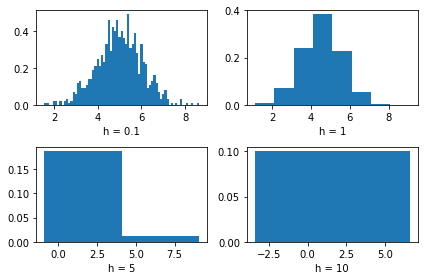

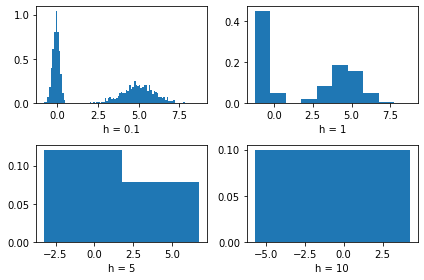

In [4]:
# 1.1
hs = (0.1, 1, 5, 10)
for idx, h in enumerate(hs, start=1):
    model.run(x_1, h)
    plt.subplot(2, 2, idx)
    model.plot()
    plt.xlabel(f"h = {h}")
    plt.tight_layout()
plt.show()

hs = (0.1, 1, 5, 10)
for idx, h in enumerate(hs, start=1):
    model.run(x_3, h)
    plt.subplot(2, 2, idx)
    model.plot()
    plt.xlabel(f"h = {h}")
    plt.tight_layout()
plt.show()

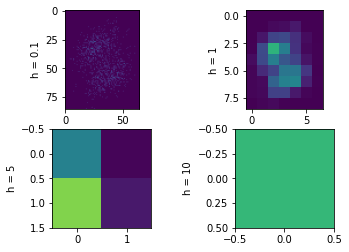

In [5]:
# 1.2
hs = (0.1, 1, 5, 10)
for idx, h in enumerate(hs, start=1):
    p, _ = model.run(x_2d_3, h)
    plt.subplot(2, 2, idx)
    model.plot()
    plt.ylabel(f"h = {h}")
plt.show()

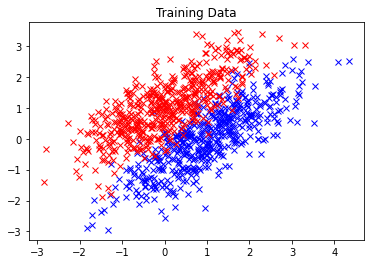

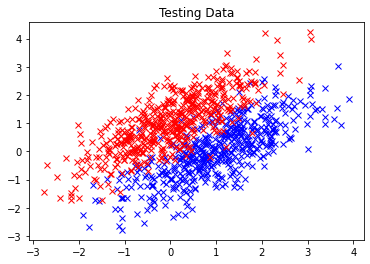

In [6]:
# Problem 2
mu_1 = [1, 0]
sigma_1 = [[1, 0.75], [0.75, 1]]

mu_2 = [0, 1]
sigma_2 = [[1, 0.75], [0.75, 1]]

x_train_1 = np.random.multivariate_normal(mu_1, sigma_1, size=500)
x_train_2 = np.random.multivariate_normal(mu_2, sigma_2, size=500)
y_train_1 = np.zeros(500, dtype=np.int)
y_train_2 = np.ones(500, dtype=np.int)
x_train = np.concatenate((x_train_1, x_train_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)

x_test_1 = np.random.multivariate_normal(mu_1, sigma_1, size=500)
x_test_2 = np.random.multivariate_normal(mu_2, sigma_2, size=500)
y_test_1 = np.zeros(500, dtype=np.int)
y_test_2 = np.ones(500, dtype=np.int)
x_test = np.concatenate((x_test_1, x_test_2), axis=0)
y_test = np.concatenate((y_test_1, y_test_2), axis=0)

plt.plot(x_train_1[:, 0], x_train_1[:, 1], 'xb')
plt.plot(x_train_2[:, 0], x_train_2[:, 1], 'xr')
plt.title("Training Data")
plt.show()

plt.plot(x_test_1[:, 0], x_test_1[:, 1], 'xb')
plt.plot(x_test_2[:, 0], x_test_2[:, 1], 'xr')
plt.title("Testing Data")
plt.show()

In [7]:
model = NaiveBayes()

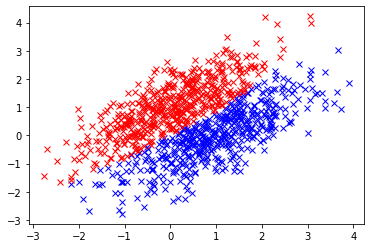

  Accuracy: 0.9210000
 Precision: 0.9168317
    Recall: 0.9260000


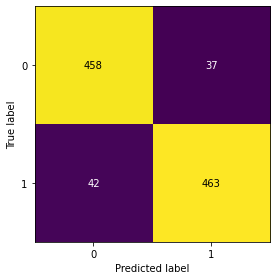

Sample N = 10
  Accuracy: 0.7380000
 Precision: 0.7102473
    Recall: 0.8040000
Sample N = 20
  Accuracy: 0.8360000
 Precision: 0.8414634
    Recall: 0.8280000
Sample N = 50
  Accuracy: 0.8580000
 Precision: 0.8683128
    Recall: 0.8440000
Sample N = 100
  Accuracy: 0.9020000
 Precision: 0.8988095
    Recall: 0.9060000
Sample N = 300
  Accuracy: 0.9140000
 Precision: 0.9173387
    Recall: 0.9100000
Sample N = 500
  Accuracy: 0.9210000
 Precision: 0.9168317
    Recall: 0.9260000


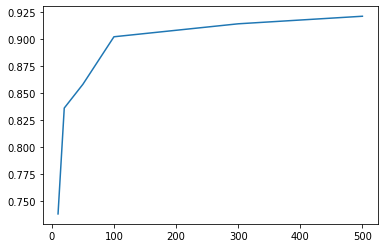

Class 0: 700, Class 1: 300


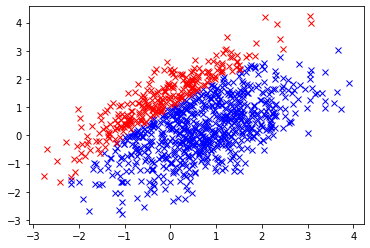

  Accuracy: 0.7690000
 Precision: 0.9963100
    Recall: 0.5400000


(0.769, 0.996309963099631, 0.54)

In [8]:
# 2.1
model.fit(x_train, y_train)

pred, _ = model.predict(x_test)
model.plot_data(x_test, pred)
model.metric(x_test, y_test, pred)

n_samples = (10, 20, 50, 100, 300, 500)
accuracy = []
for n in n_samples:
    print(f"Sample N = {n}")
    x_train = np.concatenate((x_train_1[:n], x_train_2[:n]), axis=0)
    y_train = np.concatenate((y_train_1[:n], y_train_2[:n]), axis=0)
    model.fit(x_train, y_train)
    pred, pred_score_equal = model.predict(x_test)
    acc, *_ = model.metric(x_test, y_test, pred, plot_confusion_matrix=False)
    accuracy.append(acc)
plt.plot(n_samples, accuracy)
plt.show()

x_train_1 = np.random.multivariate_normal(mu_1, sigma_1, size=700)
x_train_2 = np.random.multivariate_normal(mu_2, sigma_2, size=300)
y_train_1 = np.zeros(700, dtype=np.int)
y_train_2 = np.ones(300, dtype=np.int)
x_train_unequal = np.concatenate((x_train_1, x_train_2), axis=0)
y_train_unequal = np.concatenate((y_train_1, y_train_2), axis=0)
print("Class 0: 700, Class 1: 300")

model.fit(x_train_unequal, y_train_unequal)

pred, pred_score_unequal = model.predict(x_test)
model.plot_data(x_test, pred)
model.metric(x_test, y_test, pred, plot_confusion_matrix=False)

Equal number of samples


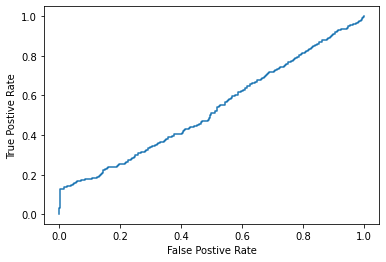

AUC: 0.530172
Unequal number of samples


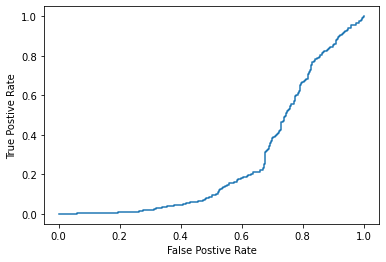

AUC: 0.271008


0.271008

In [9]:
# 2.2
print("Equal number of samples")
model.roc_auc(y_test, pred_score_equal)
print("Unequal number of samples")
model.roc_auc(y_test, pred_score_unequal)

In [10]:
# 2.3
tfidf = TFIDF()
weight_matrix = tfidf.fit('q2/Amazon_Reviews.csv')
labels = pd.read_csv("q2/Amazon_Reviews.csv")['Label']
for idx, target in enumerate(sorted(labels.unique())):
    labels[labels == target] = idx
labels = labels.astype(np.int).to_numpy()

kf = KFold(n_splits=5)
kf.get_n_splits(weight_matrix)
for idx, (train_index, test_index) in enumerate(kf.split(weight_matrix), 1):
    print(
        f"{idx}-Fold: {len(train_index)} training data, {len(test_index)} testing data"
    )
    X_train, X_test = weight_matrix[train_index], weight_matrix[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    model.fit(X_train, y_train)
    pred, _ = model.predict(X_test)
    model.metric(X_test, y_test, pred, plot_confusion_matrix=False)

1-Fold: 159 training data, 40 testing data
  Accuracy: 0.4500000
 Precision: 0.0000000
    Recall: 0.0000000
2-Fold: 159 training data, 40 testing data


/Users/linbo0518/Documents/UTA/Courses/2020 Spring/CSE-5334-Data-Mining/Assignments/Homework 2/q2/naive_bayes.py:122: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-(value - mean)**2 / (2 * var)) / np.sqrt(2 * np.pi * var)
/Users/linbo0518/Documents/UTA/Courses/2020 Spring/CSE-5334-Data-Mining/Assignments/Homework 2/q2/naive_bayes.py:122: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-(value - mean)**2 / (2 * var)) / np.sqrt(2 * np.pi * var)


  Accuracy: 0.4750000
 Precision: 0.0000000
    Recall: 0.0000000
3-Fold: 159 training data, 40 testing data
  Accuracy: 0.4250000
 Precision: 0.0000000
    Recall: 0.0000000
4-Fold: 159 training data, 40 testing data
  Accuracy: 0.4500000
 Precision: 0.0000000
    Recall: 0.0000000
5-Fold: 160 training data, 39 testing data
  Accuracy: 0.4102564
 Precision: 0.0000000
    Recall: 0.0000000
